Code for making Gen_analysis plots, which is mostly the AK8-jet gen-level anlysis -> see section 5.3 thesis

In [1]:
# import required module
import numpy as np
import os
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
plt.style.use(hep.style.CMS)

def read_file(f):
    df = pd.read_csv(f, sep="\t")
    return df

def get_combined_data(directory):
    dfs = [read_file(os.path.join(directory, f)) for f in os.listdir(directory)]
    SumWeight = np.sum([df.sumWeight[0] for df in dfs])
    DF = pd.concat(dfs, ignore_index=True)
    DF['SumWeight']= SumWeight
    return DF
    
def get_hist(DF, nbins, var):
    DF['w'] = DF.genWeights * (DF.N_exp / DF.SumWeight)
    DF['w2'] = np.square(DF.w)
    if type(nbins)==int:
        clipped = DF[var]
    else:
        clipped = np.clip(DF[var], nbins[0], nbins[-1])
    
    hist, _ = np.histogram(clipped, bins=nbins, weights=DF.w, density=True)
    w2, _ = np.histogram(clipped, bins=nbins, weights=DF.w2, density=True)
    return hist, w2

def get_num(DF, var):
    DF['w'] = DF.genWeights * (DF.N_exp / DF.SumWeight)
    DF['w2'] = np.square(DF.w)
    clipped = DF[var]    
    hist, _ = np.histogram(clipped, bins=1, weights=DF.w)
    w2, _ = np.histogram(clipped, bins=1, weights=DF.w2)
    return hist, w2

def make_layout(var, ratios):
    xlabels = {"eta" : "$\eta$", "pt": "$p_T$ (GeV)", "mass": "mass (GeV)", 'M_sd': r'$M_{SD}$',
                "phy": "$\phi$", "CA": r"$\Delta^{t}_{\eta}$", "dR": r"$\Delta{r}$", "t32": r"$\tau_{32}$", 'n': 'N', 'Ht': r'H$_T$'}
    if (ratios!='None'):
        fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 5.5), sharex=True, 
                                    gridspec_kw={'height_ratios': [2, 1]})
        ax0.yaxis.set_label_coords(-0.1, -6)
        ax0.set_ylabel(r'N$_{events}$', fontsize=20)
        ax1.set_xlabel(xlabels[var], fontsize=20)
        ax1.set_ylim(0, 3.05)
        ax1.set_ylabel(ratios, fontsize=16)
        ax1.xaxis.set_label_coords(1, -0.25)
        ax1.yaxis.set_label_coords(-0.1, 0.6)
        plt.tight_layout()
        plt.subplots_adjust(hspace=0)
        return ax0, ax1
    else:
        fig, ax = plt.subplots(figsize=(7, 5))
        ax.set_ylabel(r'N$_{events}$', fontsize=20)
        ax.set_xlabel(xlabels[var], fontsize=20)
        hep.cms.label(ax=ax, fontsize=16, llabel='Simulation Internal', rlabel=r'138 fb$^{-1}$ (13 TeV)')
        #ax.set_xscale('log')
        return ax

def gen_colors(labels):
    c = {'ttZ': "#3f90da", 'ttW': "#bd1f01" , 'DYJets': "#ffa90e", 'ttH': "#94a4a2", 'tt': "#832db6", 'ZZ': "#a96b59",
         'WZ': "#b9ac70", 'other':  "#e76300", 'ZZ2': "#717581", 'WZ2': "#92dadd", 'ttG': 'g', 'tWZ': 'b'}
    return [c[lab] for lab in labels]

def plot(title, data, w2s, bins, var, labels, ratio):
    width = (bins[0] + bins[1]) / 2
    midpoints = (bins[:-1] + bins[1:]) / 2
    edges = midpoints - width
    #edges = bins[:-1]
    if ratio=='None':
        ax = make_layout(var, 'None')
        #ax.set_title(title, size=16, y=1.2)
        hep.cms.label(ax=ax, fontsize=16, llabel='Simulation Internal', rlabel=r'138 fb$^{-1}$ (13 TeV)')
        hep.histplot(data, bins, histtype='fill', color=gen_colors(labels), stack=True, ax=ax, label=labels, binwnorm=None, ec='black')
        opts = {'step': 'post', 'label': 'Stat. unc.', 'hatch': '///',
                        'facecolor': 'none', 'edgecolor': (0, 0, 0, .5), 'linewidth': 0}
        #ax.fill_between(x=edges, y1=data-np.sqrt(w2s), y2=data+np.sqrt(w2s), **opts)
        ax.fill_between(x=edges, y1=np.sum(data, axis=0)-np.sqrt(w2s), y2=np.sum(data, axis=0)+np.sqrt(w2s), **opts)
        ax.legend(fontsize=16)
    return ax

In [2]:
DFS = get_combined_data('output/ttZ3l_nottag/ttZ3l_Flags')
DFS_a = DFS.loc[DFS['Flag'] == 'a']
DFS_b = DFS.loc[DFS['Flag'] == 'b']
DFS_c = DFS.loc[DFS['Flag'] == 'c']
DFS_d = DFS.loc[DFS['Flag'] == 'd']

/user/acauwels/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/user/acauwels/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


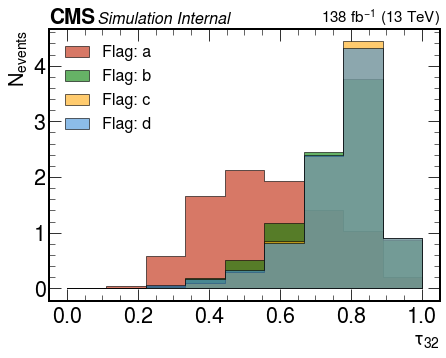

In [3]:
bins = np.linspace(0, 1, 10)
var = 't32'

a_bins, w2_a = get_hist(DFS_a, bins, var)
b_bins, w2_b = get_hist(DFS_b, bins, var)
c_bins, w2_c = get_hist(DFS_c, bins, var)
d_bins, w2_d = get_hist(DFS_d, bins, var)

ax = make_layout('t32', 'None')
hep.histplot(a_bins, bins, ax=ax, label= r'Flag: a', binwnorm=None, histtype='fill', alpha=0.6, color="#bd1f01", ec='black')
hep.histplot(b_bins, bins, ax=ax, label= r'Flag: b', binwnorm=None, histtype='fill', alpha=0.6, color="g", ec='black')
hep.histplot(c_bins, bins, ax=ax, label= r'Flag: c', binwnorm=None, histtype='fill', alpha=0.6, color="#ffa90e", ec='black')
hep.histplot(d_bins, bins, ax=ax, label= r'Flag: d', binwnorm=None, histtype='fill', alpha=0.6, color="#3f90da", ec='black')
ax.legend(fontsize=16, loc='upper left')


/user/acauwels/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/user/acauwels/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'After t-tagging')

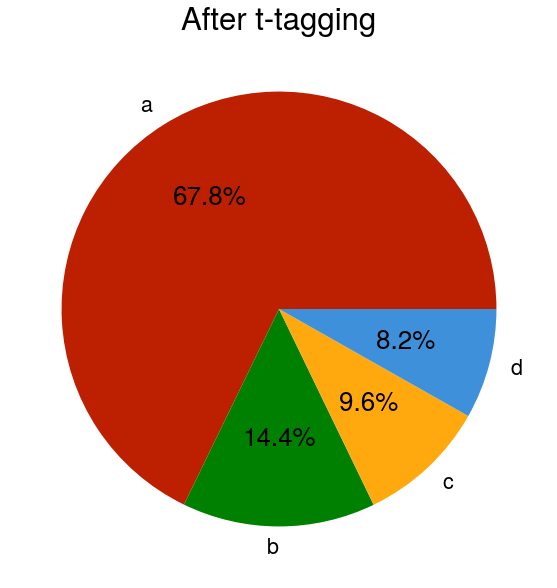

In [13]:
DFS = get_combined_data('output/ttZ3l_LWPttag/ttZ3l_Flags')
DFS_a = DFS.loc[DFS['Flag'] == 'a']
DFS_b = DFS.loc[DFS['Flag'] == 'b']
DFS_c = DFS.loc[DFS['Flag'] == 'c']
DFS_d = DFS.loc[DFS['Flag'] == 'd']
var = 'Msd'

a, _ = get_num(DFS_a, var)
b, _ = get_num(DFS_b, var)
c, _ = get_num(DFS_c, var)
d, _ = get_num(DFS_d, var)
list = [a, b, c, d]
tot = np.sum(list)
data = ak.flatten(list)/tot

plt.pie(data, labels=['a', 'b', 'c', 'd'], colors=["#bd1f01", "g", "#ffa90e", "#3f90da"],  autopct='%1.1f%%')
plt.title('After t-tagging')